# CAPSTONE PROJECT-4 :- PRCP-1001-RiceLeaf
# PROJECT TEAM ID :- PTID-CDS-OCT-23-1659


### Introduction:
**Rice leaf, a vital component of the rice plant (Oryza sativa), is a crucial element in the world's agricultural landscape. These leaves play a significant role in the growth and development of the rice plant, which is a staple food for a large portion of the global population. Rice leaves are characterized by their long, slender shape and green color, and they are responsible for photosynthesis, a fundamental process that converts sunlight into energy and sustains the plant's growth. Additionally, rice leaves also serve as a key indicator of the plant's health and can provide valuable insights into its overall condition. The understanding of rice leaves are essential for maximizing rice production and ensuring food security for millions of people worldwide.**

- Rice plant is susceptible to diseases that may affect the quantity and quality of rice production. Detection of these diseases by the farmers will require a great knowledge about the various disease and how to identify them visually. Monitoring these diseases, their occurrences and frequencies are very important for early detection of the affected plants, their timely treatment, and most importantly, for planning future strategies to prevent the diseases to minimize the losses. CNN is an algorithm of deep learning techniques that has been successfully invoked for handling computer vision issues such as picture classification, object segmentation, and image analysis. CNN has been used to address the classification of Rice leaf diseases accurate detection and classification of rice leaf disease.


- The dataset provided contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class. Classes



- **Bacterial blight:** elongated lesions near the leaf tips and margins, and turns white to yellow and then grey due to fungal attack.

- **Brown spot:** dark brown colored and round to oval shaped lesions on rice leaves.

- **Leaf smut:** small black linear lesions on leaf blades, leaf tips may turn grey and dry.

## AIM
#### **Task 1:-Prepare a complete data analysis report on the given data.**

#### **Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.**

#### **Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.**

## IMPORT LIABRARIES

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
import cv2
import warnings
warnings.filterwarnings('ignore')


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Lambda,Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,Convolution2D,MaxPool2D,MaxPooling2D,BatchNormalization
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [6]:
#Give the Dataset path
train_path=r'D:\capstone projects\PRCP-1001-RiceLeaf\Data\train'
test_path=r'D:\capstone projects\PRCP-1001-RiceLeaf\Data\test'

In [7]:
# useful for getting number of classes
train_folders=glob('D:\capstone projects\PRCP-1001-RiceLeaf\Data\*')
print(len(train_folders))

3


In [8]:
# useful for getting number of classes
test_folders=glob('D:\capstone projects\PRCP-1001-RiceLeaf\Data\*')
print(len(test_folders))

3


## Load The Data

## Visualizing the Image Data

### 1.Bacterial leaf blight

C:\Users\Admin\AppData\Local\Temp\ipykernel_9872\2958843900.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


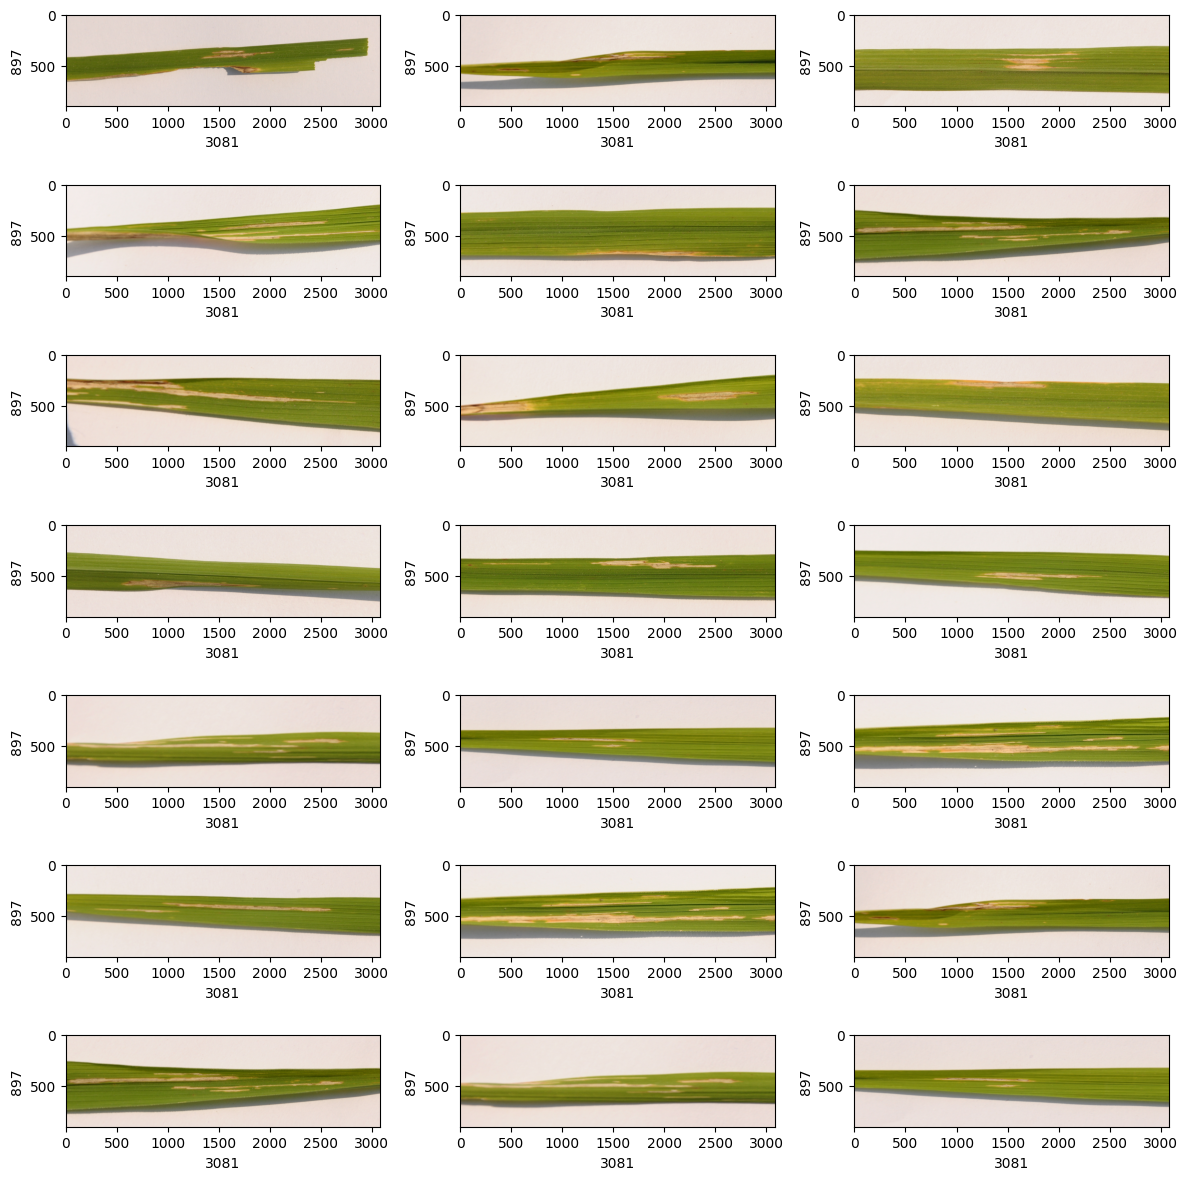

In [9]:
plt.figure(figsize = (12, 12))
bacteria_path = r"D:\capstone projects\PRCP-1001-RiceLeaf\Data\Bacterial leaf blight-20200814T055237Z-001\Bacterial leaf blight"
for i in range(1, 22):
    plt.subplot(7, 3, i)
    plt.tight_layout()
    rand_img = plt.imread(bacteria_path +'/'+ random.choice(sorted(os.listdir(bacteria_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### 2.Brown Spot¶

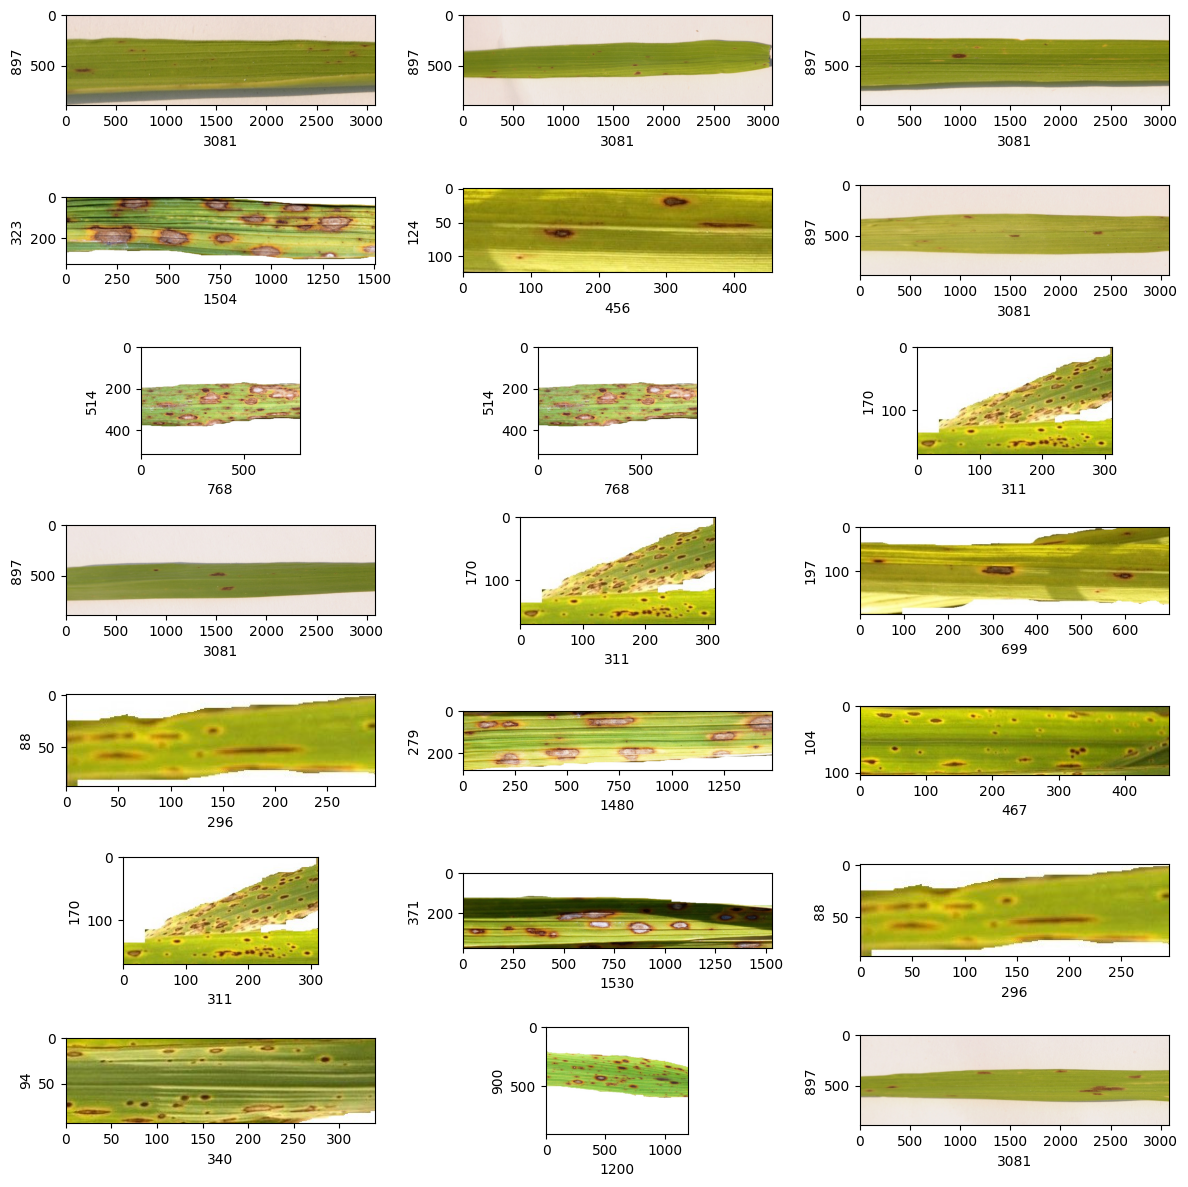

In [11]:
plt.figure(figsize=(12,12))
brown_path =  r"D:\capstone projects\PRCP-1001-RiceLeaf\Data\Brown spot-20200814T055208Z-001\Brown spot"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(brown_path +'/'+ random.choice(sorted(os.listdir(brown_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image 

### 3.Leaf Smut

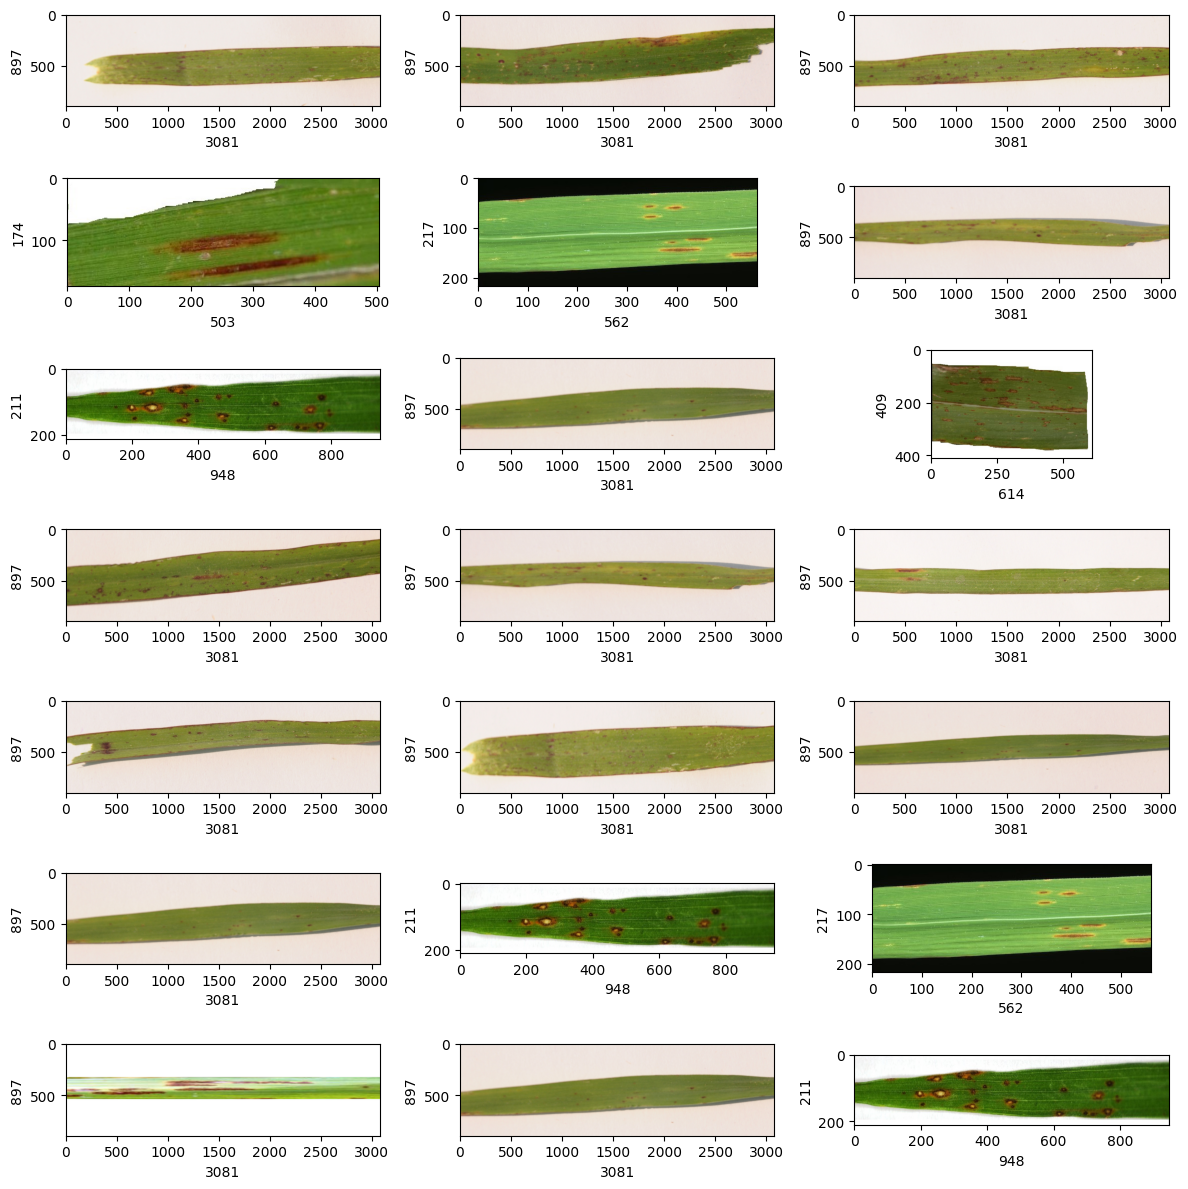

In [12]:
plt.figure(figsize=(12,12))
leaf_smut_path =r"D:\capstone projects\PRCP-1001-RiceLeaf\Data\Leaf smut-20200814T055530Z-001\Leaf smut"
for i in range(1,22):
    plt.subplot(7,3,i)
    plt.tight_layout()
    rand_img = plt.imread(leaf_smut_path +'/'+ random.choice(sorted(os.listdir(leaf_smut_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Data Preprocessing

In [13]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = .25)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = .25)

### Example of Data Augmentation

In [14]:
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

In [17]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(r"D:\capstone projects\PRCP-1001-RiceLeaf\Data\Brown spot\Brown spot\DSC_0101.jpg")  #this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"D:\capstone projects\PRCP-1001-RiceLeaf\image_agumantation_example", save_prefix='rice_leaf_brown_spot', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

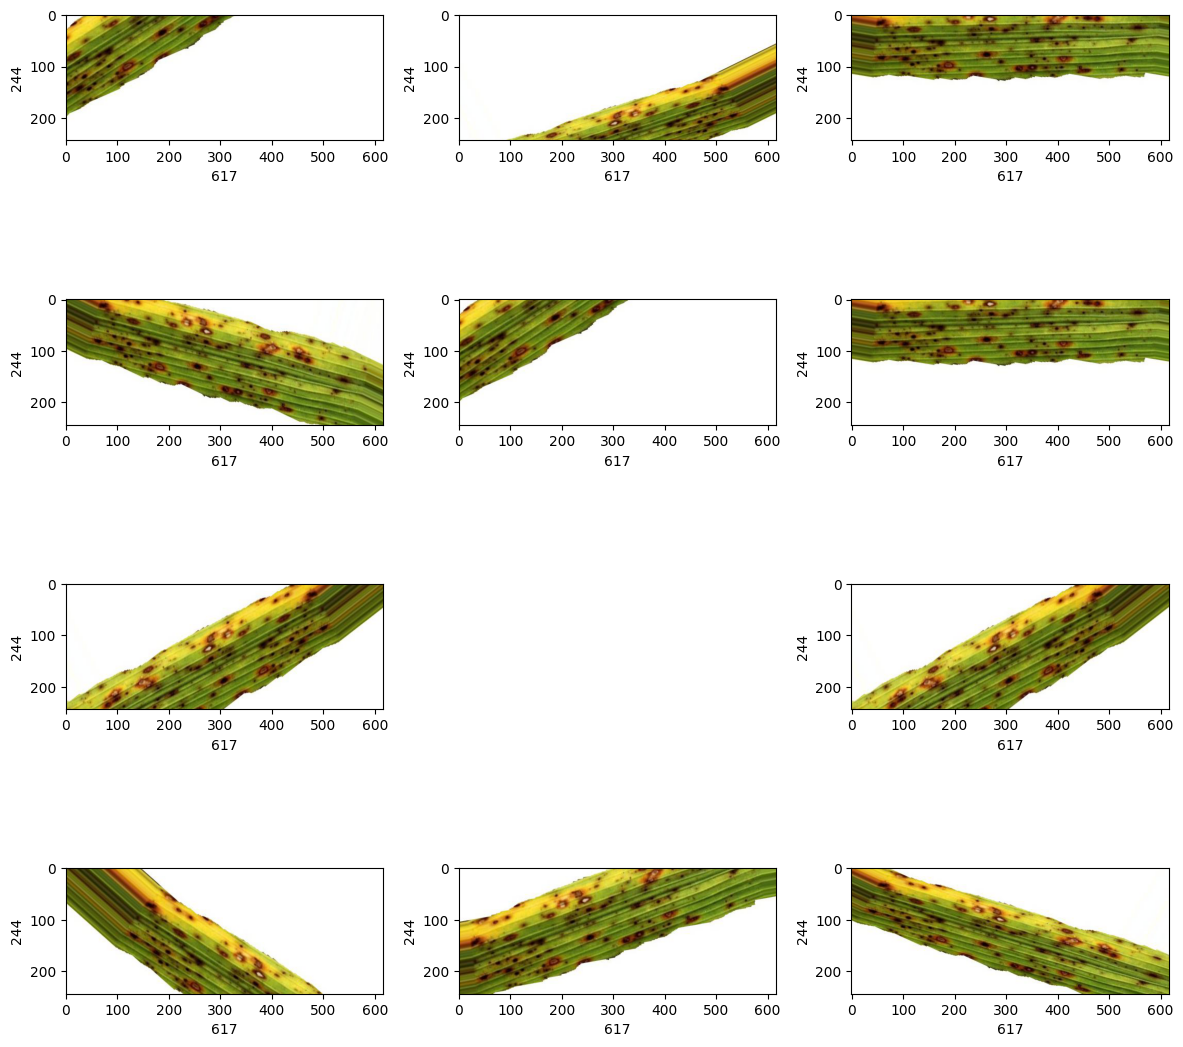

In [18]:
plt.figure(figsize=(12,12))
path = r"D:\capstone projects\PRCP-1001-RiceLeaf\image_agumantation_example"
for i in range(1,13):
    plt.subplot(4,3,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

## Generating a Training and Validation set

In [19]:
training_set = train_datagen.flow_from_directory(r"D:\capstone projects\PRCP-1001-RiceLeaf\Data",
                                       target_size=(256, 256),
                                                 batch_size=5,
                                     class_mode='categorical',
                                            subset='training')


Found 90 images belonging to 3 classes.


In [20]:
validation_set = train_datagen.flow_from_directory(r"D:\capstone projects\PRCP-1001-RiceLeaf\Data",
                                       target_size=(256, 256),
                                                 batch_size=5,
                                     class_mode='categorical',
                                            subset='validation')

Found 29 images belonging to 3 classes.


## Building the Convolution Neural Network Model

## 1.Using ADAM Optimiser

In [21]:
#Initialising the CNN model
model_adam = Sequential()
# First Convolution Layer
model_adam.add(Conv2D(filters= 16, kernel_size=2, activation='relu', input_shape=[256, 256, 3]))
# First Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Second Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Second Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Third Convolution Layer
model_adam.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
# Third Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Fourth Convolution Layer.
model_adam.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
# Fourth Pooling Layer
model_adam.add(MaxPooling2D(pool_size=2))
# Flattening
model_adam.add(Flatten())

# Fully Connected Layer
model_adam.add(Dense(128, activation="relu"))
# Deactivating 50% of neuron
model_adam.add(Dropout(0.5))

# Output Layer
model_adam.add(Dense(3, activation="softmax"))

In [22]:
## Layers
model_adam.layers

In [23]:
## Summary
model_adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0

In [24]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
early_stopping

## Compliling the model¶

In [26]:
from keras.optimizers import Adam

In [27]:
model_adam.compile(loss = 'categorical_crossentropy',  optimizer = 'adam', metrics=['accuracy'])

In [28]:
# Training the model
history_adam = model_adam.fit_generator(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=150,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))
                    

Epoch 1/150
18/18 [==============================] - 10s 459ms/step - loss: 1.1264 - accuracy: 0.3222 - val_loss: 1.1022 - val_accuracy: 0.3103
Epoch 2/150
18/18 [==============================] - 7s 373ms/step - loss: 1.1117 - accuracy: 0.3333 - val_loss: 1.0953 - val_accuracy: 0.3793
Epoch 3/150
18/18 [==============================] - 7s 399ms/step - loss: 1.0938 - accuracy: 0.3667 - val_loss: 1.0619 - val_accuracy: 0.4483
Epoch 4/150
18/18 [==============================] - 9s 498ms/step - loss: 1.0880 - accuracy: 0.3667 - val_loss: 1.0578 - val_accuracy: 0.3793
Epoch 5/150
18/18 [==============================] - 9s 478ms/step - loss: 1.0868 - accuracy: 0.4000 - val_loss: 1.0890 - val_accuracy: 0.3793
Epoch 6/150
18/18 [==============================] - 8s 461ms/step - loss: 1.0686 - accuracy: 0.4111 - val_loss: 0.9028 - val_accuracy: 0.6552
Epoch 7/150
18/18 [==============================] - 8s 466ms/step - loss: 1.0882 - accuracy: 0.4444 - val_loss: 0.9841 - val_accuracy: 0.344

Epoch 58/150
18/18 [==============================] - 12s 693ms/step - loss: 0.5664 - accuracy: 0.7444 - val_loss: 1.9682 - val_accuracy: 0.7931
Epoch 59/150
18/18 [==============================] - 13s 700ms/step - loss: 0.5292 - accuracy: 0.7333 - val_loss: 1.6717 - val_accuracy: 0.8276
Epoch 60/150
18/18 [==============================] - 12s 694ms/step - loss: 0.5101 - accuracy: 0.7556 - val_loss: 2.4843 - val_accuracy: 0.7931
Epoch 61/150
18/18 [==============================] - 13s 707ms/step - loss: 0.5489 - accuracy: 0.7444 - val_loss: 6.6932 - val_accuracy: 0.5517
Epoch 62/150
18/18 [==============================] - 13s 709ms/step - loss: 0.5448 - accuracy: 0.7222 - val_loss: 1.0704 - val_accuracy: 0.8621
Epoch 63/150
18/18 [==============================] - 13s 695ms/step - loss: 0.4944 - accuracy: 0.8000 - val_loss: 1.7919 - val_accuracy: 0.7241
Epoch 64/150
18/18 [==============================] - 13s 699ms/step - loss: 0.4885 - accuracy: 0.7444 - val_loss: 3.4322 - val_ac

18/18 [==============================] - 13s 702ms/step - loss: 0.2766 - accuracy: 0.8667 - val_loss: 2.5792 - val_accuracy: 0.6552
Epoch 115/150
18/18 [==============================] - 13s 750ms/step - loss: 0.4171 - accuracy: 0.8333 - val_loss: 2.4813 - val_accuracy: 0.7586
Epoch 116/150
18/18 [==============================] - 13s 703ms/step - loss: 0.2453 - accuracy: 0.9111 - val_loss: 4.9608 - val_accuracy: 0.7241
Epoch 117/150
18/18 [==============================] - 13s 746ms/step - loss: 0.2018 - accuracy: 0.9333 - val_loss: 4.7974 - val_accuracy: 0.7241
Epoch 118/150
18/18 [==============================] - 13s 704ms/step - loss: 0.1979 - accuracy: 0.9222 - val_loss: 2.8797 - val_accuracy: 0.7241
Epoch 119/150
18/18 [==============================] - 13s 735ms/step - loss: 0.3285 - accuracy: 0.8889 - val_loss: 2.2545 - val_accuracy: 0.7931
Epoch 120/150
18/18 [==============================] - 13s 709ms/step - loss: 0.2864 - accuracy: 0.9000 - val_loss: 1.9843 - val_accuracy:

In [29]:
score_adam = model_adam.evaluate(validation_set,verbose=0)
accuracy_adam = 100*score_adam[1]
print('Accuracy CNN Model with Adam Optimizer:',accuracy_adam)

Accuracy CNN Model with Adam Optimizer: 82.75862336158752


In [30]:
history_adam.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Model Loss

Text(0.5, 1.0, 'Model Loss')

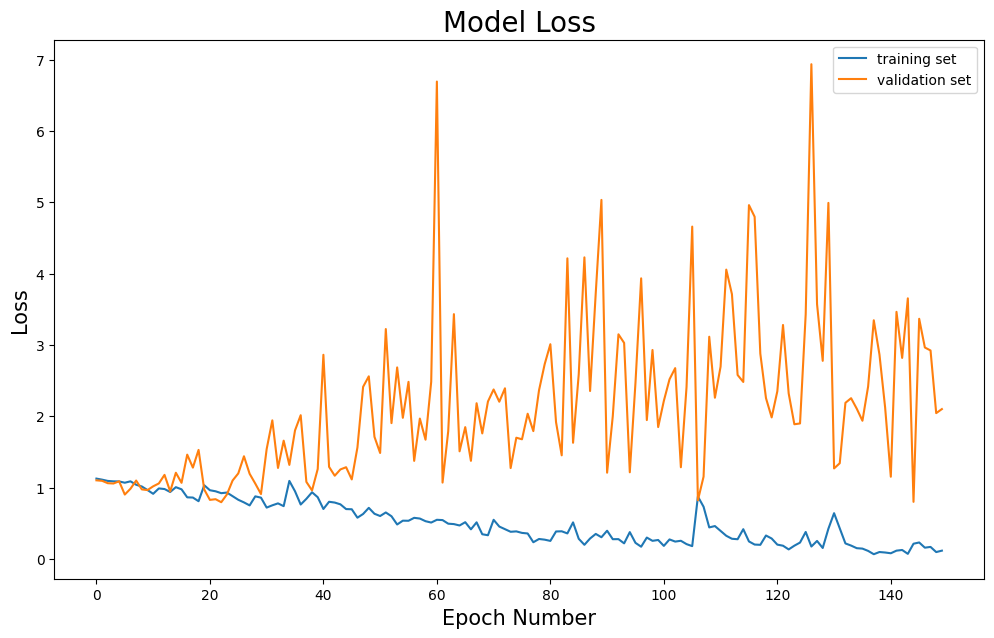

In [31]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.plot(history_adam.history['loss'], label = 'training set')
plt.plot(history_adam.history['val_loss'], label = 'validation set')
plt.legend()
plt.title("Model Loss",fontsize=20)

## Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

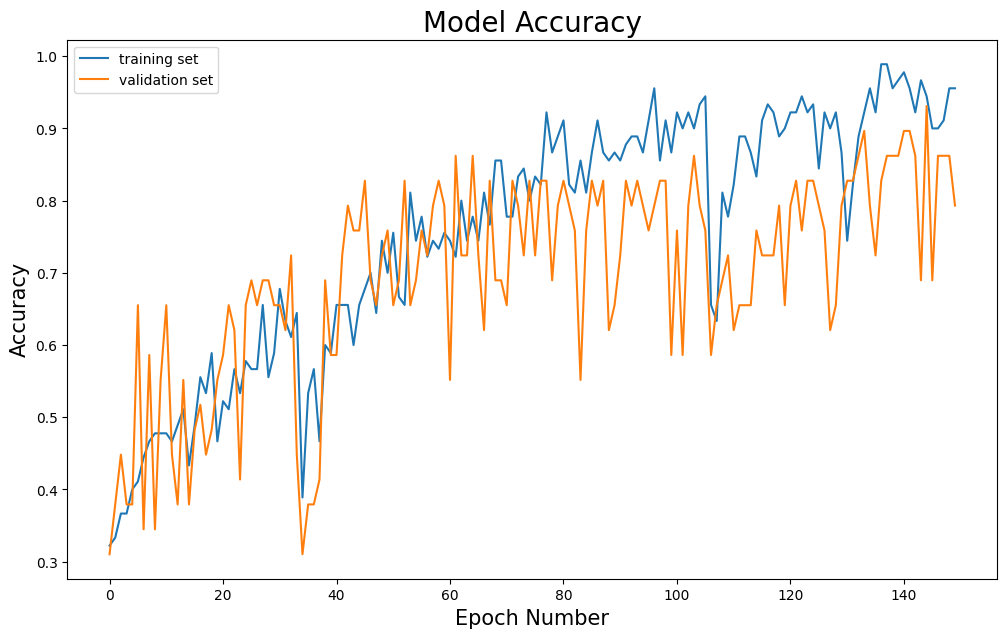

In [32]:
plt.figure(figsize=(12,7))
plt.xlabel('Epoch Number',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.plot(history_adam.history['accuracy'], label = 'training set')
plt.plot(history_adam.history['val_accuracy'], label = 'validation set')
plt.legend()
plt.title("Model Accuracy",fontsize=20)